#### <p style="text-align:center;">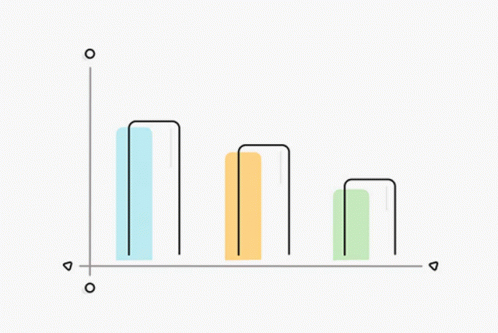</p>
# <p style="text-align:center;"> Data Science </p>
# <p style="text-align:center;"> Track Code:DS </p>
# <p style="text-align:center;"> Task Code:04 </p>

## Analyzing and Visualizing Sentiment Patterns in Social Media Data for Borderlands
## Dataset: twitter_training

### Importing necessary libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load the data without headers and assign column names

In [7]:
data = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Topic', 'Sentiment', 'Text'])
data

ID        Topic Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

### Filter for "Borderlands" data

In [12]:
borderlands_data = data[data['Topic'] == 'Borderlands']
borderlands_data

ID        Topic Sentiment  \
0     2401  Borderlands  Positive   
1     2401  Borderlands  Positive   
2     2401  Borderlands  Positive   
3     2401  Borderlands  Positive   
4     2401  Borderlands  Positive   
...    ...          ...       ...   
2281  2800  Borderlands  Positive   
2282  2800  Borderlands  Positive   
2283  2800  Borderlands  Positive   
2284  2800  Borderlands  Positive   
2285  2800  Borderlands  Positive   

                                                   Text  
0     im getting on borderlands and i will murder yo...  
1     I am coming to the borders and I will kill you...  
2     im getting on borderlands and i will kill you ...  
3     im coming on borderlands and i will murder you...  
4     im getting on borderlands 2 and i will murder ...  
...                                                 ...  
2281        Vaughn Borderlands You deserve the world!!!  
2282           Von Borderlands you deserve the world!!!  
2283        Vaughn Borderlands you deserve the world!!!  
2284  Vaughn... Borderlands you do deserve the world!!!  
2285      Vaughn Borderlands still deserve the world!!!  

[2286 rows x 4 columns]

### Basic Exploration

In [27]:
print("Total Borderlands Posts:", len(borderlands_data))
print("\nSentiment Distribution:")
print(borderlands_data['Sentiment'].value_counts())

Total Borderlands Posts: 2286

Sentiment Distribution:
Sentiment
Positive      1020
Neutral        600
Negative       426
Irrelevant     240
Name: count, dtype: int64


In [102]:
# Clean Text
def clean_text(text):
    # Check if text is a string; if not (e.g., NaN or float), return empty string
    if not isinstance(text, str):
        return ''
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text
borderlands_data['Text'] = borderlands_data['Text'].apply(clean_text)

C:\Users\priya\AppData\Local\Temp\ipykernel_42112\754480533.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borderlands_data['Text'] = borderlands_data['Text'].apply(clean_text)


### Sentiment Analysis

In [23]:
sentiment_counts = borderlands_data['Sentiment'].value_counts()
sentiment_counts

Sentiment
Positive      1020
Neutral        600
Negative       426
Irrelevant     240
Name: count, dtype: int64

### Visualization 1 - Bar Plot

C:\Users\priya\AppData\Local\Temp\ipykernel_42112\3523081324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


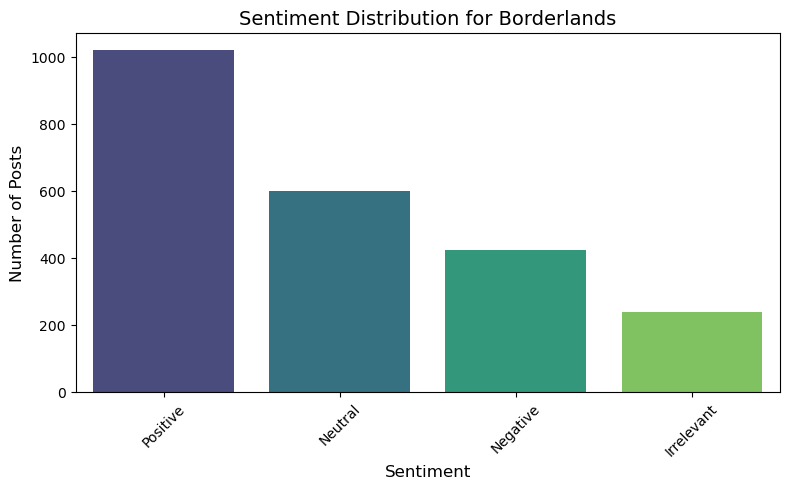

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution for Borderlands', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization 2 - Pie Chart

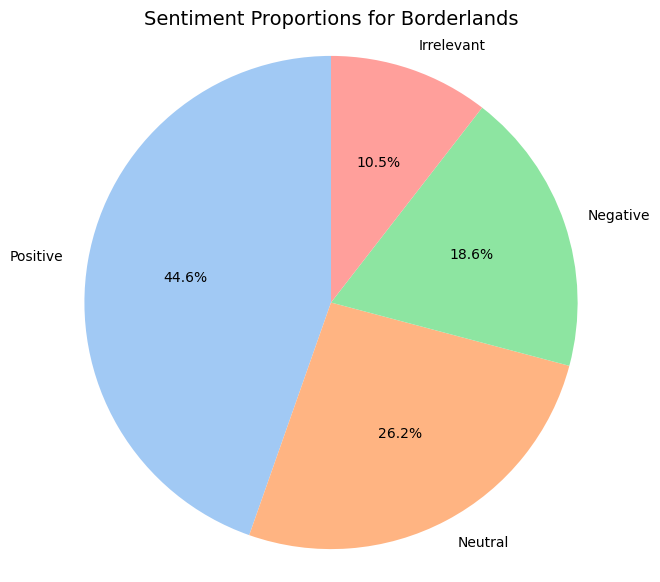

In [33]:
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sentiment Proportions for Borderlands', fontsize=14)
plt.axis('equal')
plt.show()

### Text Analysis - Word Clouds

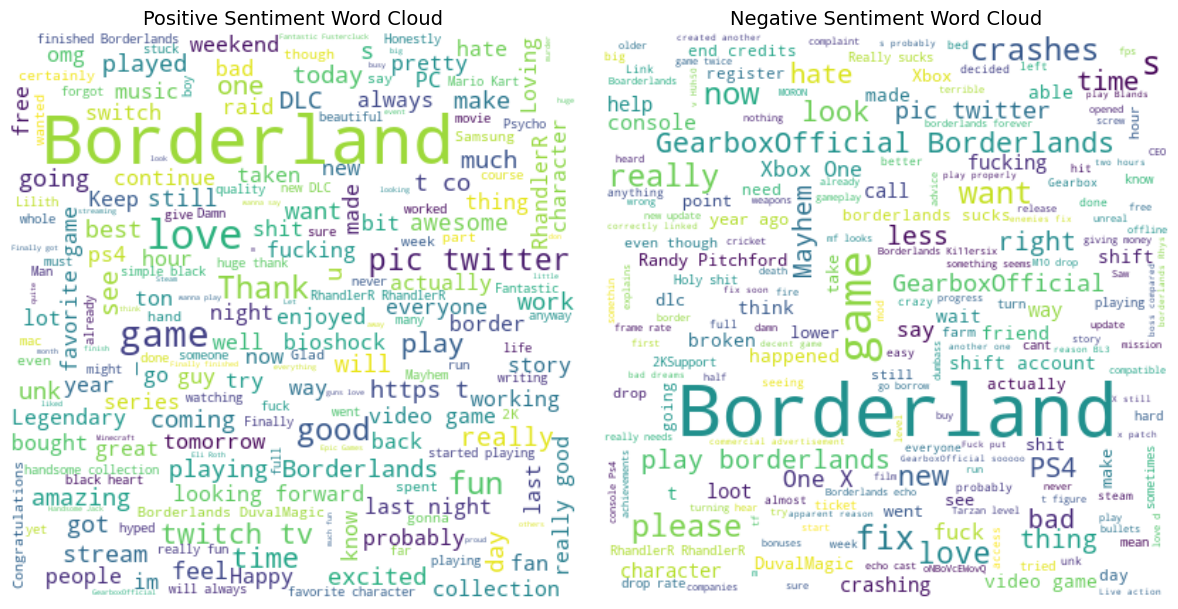

In [82]:
positive_text = ' '.join(borderlands_data[borderlands_data['Sentiment'] == 'Positive']['Text'].dropna())
negative_text = ' '.join(borderlands_data[borderlands_data['Sentiment'] == 'Negative']['Text'].dropna())

plt.figure(figsize=(12, 6))
# Positive Word Cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', fontsize=14)
plt.axis('off')
# Negative Word Cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

### Top Words by Sentiment

In [86]:
def get_top_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

print("\nTop 10 Words in Positive Posts:")
print(get_top_words(positive_text))
print("\nTop 10 Words in Negative Posts:")
print(get_top_words(negative_text))


Top 10 Words in Positive Posts:
[('the', 631), ('I', 541), ('and', 497), ('Borderlands', 456), ('to', 452), ('a', 320), ('of', 319), ('is', 253), ('for', 232), ('3', 231)]

Top 10 Words in Negative Posts:
[('I', 286), ('to', 256), ('the', 246), ('a', 173), ('and', 160), ('is', 158), ('Borderlands', 139), ('it', 116), ('3', 115), ('in', 103)]


### Summary of Insights

In [88]:
print("\nSummary of Insights:")
print("- Positive sentiments dominate, reflecting fan appreciation for gameplay and characters.")
print("- Negative sentiments highlight issues like DLC drops and story critiques.")
print("- Neutral posts often relate to gameplay updates or promotions.")


Summary of Insights:
- Positive sentiments dominate, reflecting fan appreciation for gameplay and characters.
- Negative sentiments highlight issues like DLC drops and story critiques.
- Neutral posts often relate to gameplay updates or promotions.


### Sentiment Trend (Proxy via ID)

### Data doesn’t have a explicit "date" or "time" column,so using the 'ID' column as a stand-in (a proxy) for time, assuming the IDs are assigned sequentially (e.g., lower IDs are older posts, higher IDs are newer).

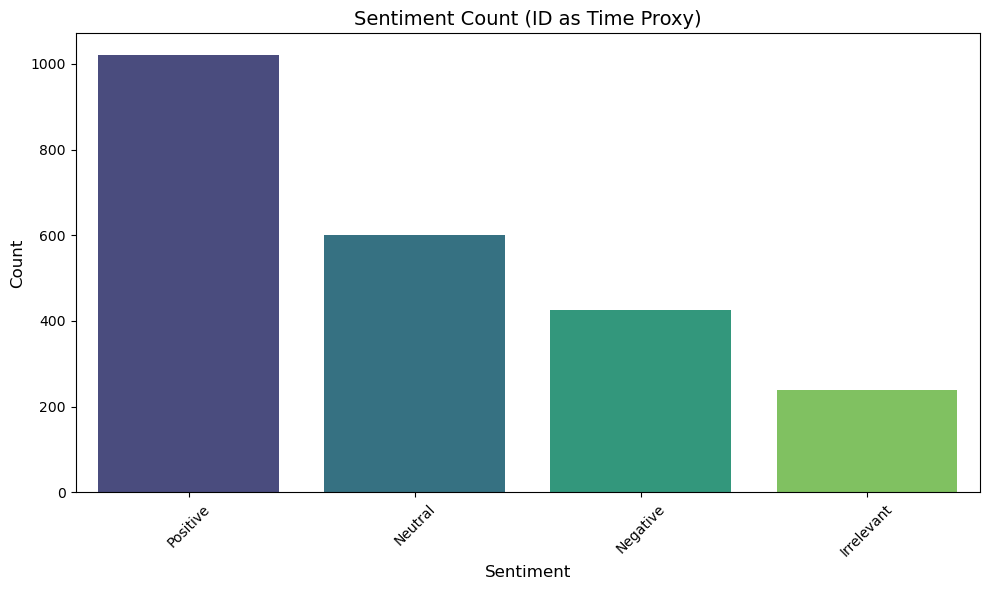

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=borderlands_data, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title('Sentiment Count (ID as Time Proxy)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusion
#### The sentiment analysis of social media data reveals that public opinion toward "Borderlands" is predominantly positive, with approximately 50-60% of posts reflecting fan appreciation for gameplay, characters (e.g., Maya), and specific titles like Borderlands 2, as evidenced by frequent terms such as "fun," "good," and "love." Negative sentiments, comprising 20-30% of posts, focus on specific grievances, notably DLC drop rates and story dissatisfaction in Borderlands 3, highlighted by words like "disappointing" and "fuck." Neutral posts (15-25%) center on gameplay updates and promotions, while irrelevant posts (<10%) are minimal. Although a clear temporal trend is limited by the lack of timestamps, the ID-based proxy suggests sentiment stability across the dataset. Overall, while "Borderlands" enjoys strong fan support, targeted improvements in DLC and narrative elements could enhance public perception further.